<a href="https://colab.research.google.com/github/Ridansh71/Clustering/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### IMPORTING LIBRARIES

In [2]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

### LOADING THE DATASET

In [13]:
data = load_diabetes()
X = data.data

### CLUSTERING ALGORITHMS

In [11]:
preprocessing_techniques = {'Standard Scaling': StandardScaler(),
    'Min-Max Scaling': MinMaxScaler(),
    'PCA': PCA(n_components=2)
}

In [9]:
clustering_algorithms = {'KMeans':KMeans(n_clusters=2) ,
                         'AgglomerativeClustering':AgglomerativeClustering(n_clusters=2) ,
                         'DBSCAN':DBSCAN(eps=0.5, min_samples=5)
                         }

In [ ]:
results_dict = {algo_name: [] for algo_name in clustering_algorithms.keys()}
X_scaled = StandardScaler().fit_transform(X)
X_minmax_scaled = MinMaxScaler().fit_transform(X)

# Iterate over clustering algorithms
for algo_name, algorithm in clustering_algorithms.items():
    print(f"Evaluating {algo_name} algorithm:")
    for prep_name, preprocessor in preprocessing_techniques.items():
        print(f"Preprocessing Technique: {prep_name}")

        # Preprocess the data
        if prep_name == 'PCA':
            X_processed = preprocessor.fit_transform(X_scaled)
        else:
            X_processed = preprocessor.fit_transform(X)

        # Fit the algorithm to the preprocessed data
        algorithm.fit(X_processed)

        # Predict cluster labels
        labels = algorithm.labels_

        # Check if there are at least two unique labels
        unique_labels = len(set(labels))
        if unique_labels < 2:
            print("Error: Less than two unique labels produced by the clustering algorithm.")
            print()
            continue

        # Evaluate clustering using silhouette score
        silhouette = silhouette_score(X_processed, labels)

        # Evaluate clustering using Calinski-Harabasz score
        ch_score = calinski_harabasz_score(X_processed, labels)

        # Evaluate clustering using Davies-Bouldin score
        db_score = davies_bouldin_score(X_processed, labels)

        # Append results to the list
        results_dict[algo_name].append({
                    'Algorithm': algo_name,
                    'Processing Method': prep_name,
                    'Silhouette Score': silhouette,
                    'Calinski-Harabasz Score': ch_score,
                    'Davies-Bouldin Score': db_score
                })


### PRINTING RESULTS

In [35]:
dfs = {}
for algo_name, results in results_dict.items():
    dfs[algo_name] = pd.DataFrame(results)

for algo_name, df in dfs.items():
    print(f"Clustering Algorithm: {algo_name}\n")
    print(df.to_string(index=False))
    print("\n\n")

Clustering Algorithm: KMeans

Algorithm Processing Method  Silhouette Score  Calinski-Harabasz Score  Davies-Bouldin Score
   KMeans  Standard Scaling          0.236987               172.216327              1.545465
   KMeans   Min-Max Scaling          0.436114               411.727868              0.982566
   KMeans               PCA          0.432384               457.222092              0.874382



Clustering Algorithm: AgglomerativeClustering

              Algorithm Processing Method  Silhouette Score  Calinski-Harabasz Score  Davies-Bouldin Score
AgglomerativeClustering  Standard Scaling          0.179950               122.009599              1.730710
AgglomerativeClustering   Min-Max Scaling          0.436114               411.727868              0.982566
AgglomerativeClustering               PCA          0.430814               454.259241              0.875071



Clustering Algorithm: DBSCAN

Algorithm Processing Method  Silhouette Score  Calinski-Harabasz Score  Davies-Bouldin 

### Saving results in a csv file

In [36]:
for algo_name, df in dfs.items():
    df.to_csv(f"{algo_name}_results.csv", index=False)
    print(f"Results for {algo_name} saved to {algo_name}_results.csv")


Results for KMeans saved to KMeans_results.csv
Results for AgglomerativeClustering saved to AgglomerativeClustering_results.csv
Results for DBSCAN saved to DBSCAN_results.csv


### VISUALIZATION

<ipython-input-39-36dbd2e08057>:18: UserWarning: The palette list has more values (3) than needed (1), which may not be intended.
  sns.barplot(x='Processing Method', y='Silhouette Score', data=df, hue='Algorithm', palette=silhouette_palette, ax=axes[0])
<ipython-input-39-36dbd2e08057>:26: UserWarning: The palette list has more values (3) than needed (1), which may not be intended.
  sns.barplot(x='Processing Method', y='Calinski-Harabasz Score', data=df, hue='Algorithm', palette=calinski_palette, ax=axes[1])
<ipython-input-39-36dbd2e08057>:34: UserWarning: The palette list has more values (3) than needed (1), which may not be intended.
  sns.barplot(x='Processing Method', y='Davies-Bouldin Score', data=df, hue='Algorithm', palette=davies_palette, ax=axes[2])


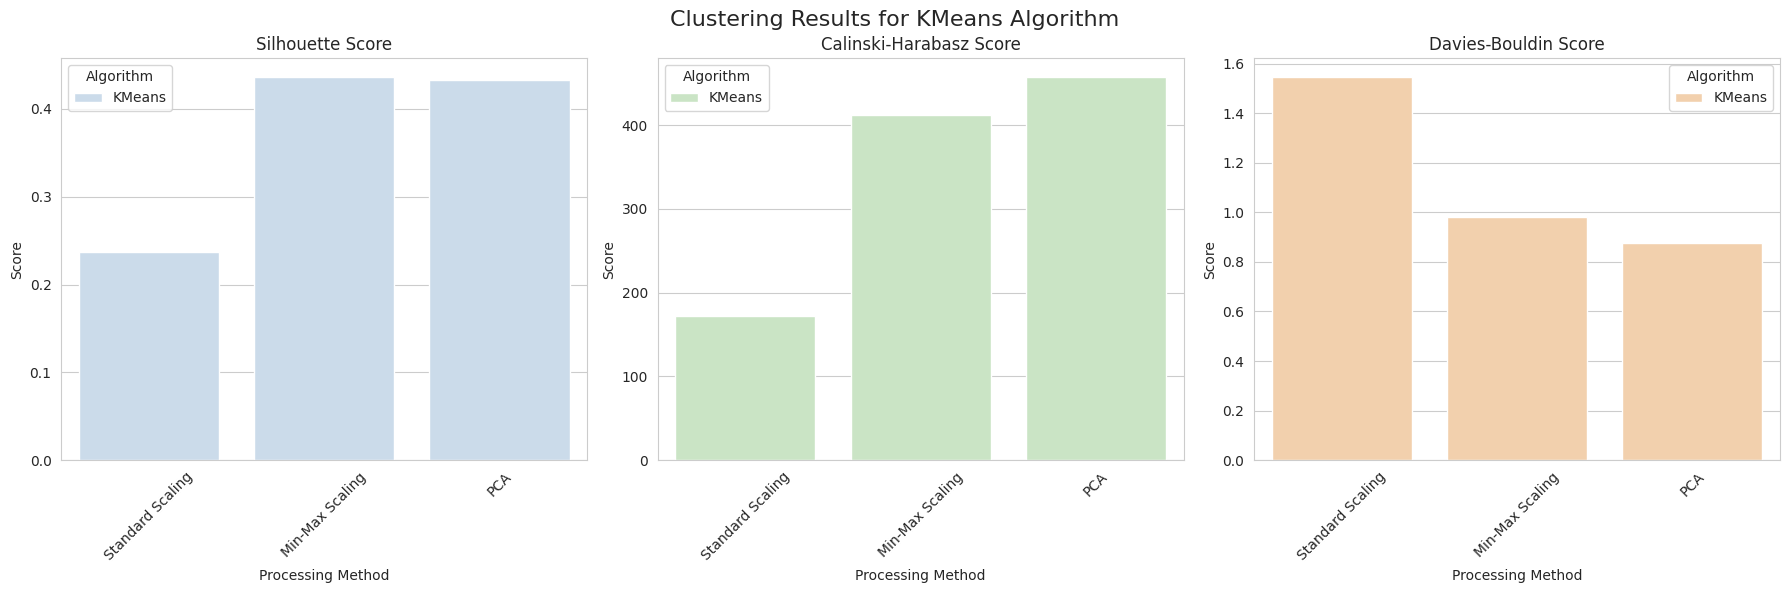

<ipython-input-39-36dbd2e08057>:18: UserWarning: The palette list has more values (3) than needed (1), which may not be intended.
  sns.barplot(x='Processing Method', y='Silhouette Score', data=df, hue='Algorithm', palette=silhouette_palette, ax=axes[0])
<ipython-input-39-36dbd2e08057>:26: UserWarning: The palette list has more values (3) than needed (1), which may not be intended.
  sns.barplot(x='Processing Method', y='Calinski-Harabasz Score', data=df, hue='Algorithm', palette=calinski_palette, ax=axes[1])
<ipython-input-39-36dbd2e08057>:34: UserWarning: The palette list has more values (3) than needed (1), which may not be intended.
  sns.barplot(x='Processing Method', y='Davies-Bouldin Score', data=df, hue='Algorithm', palette=davies_palette, ax=axes[2])


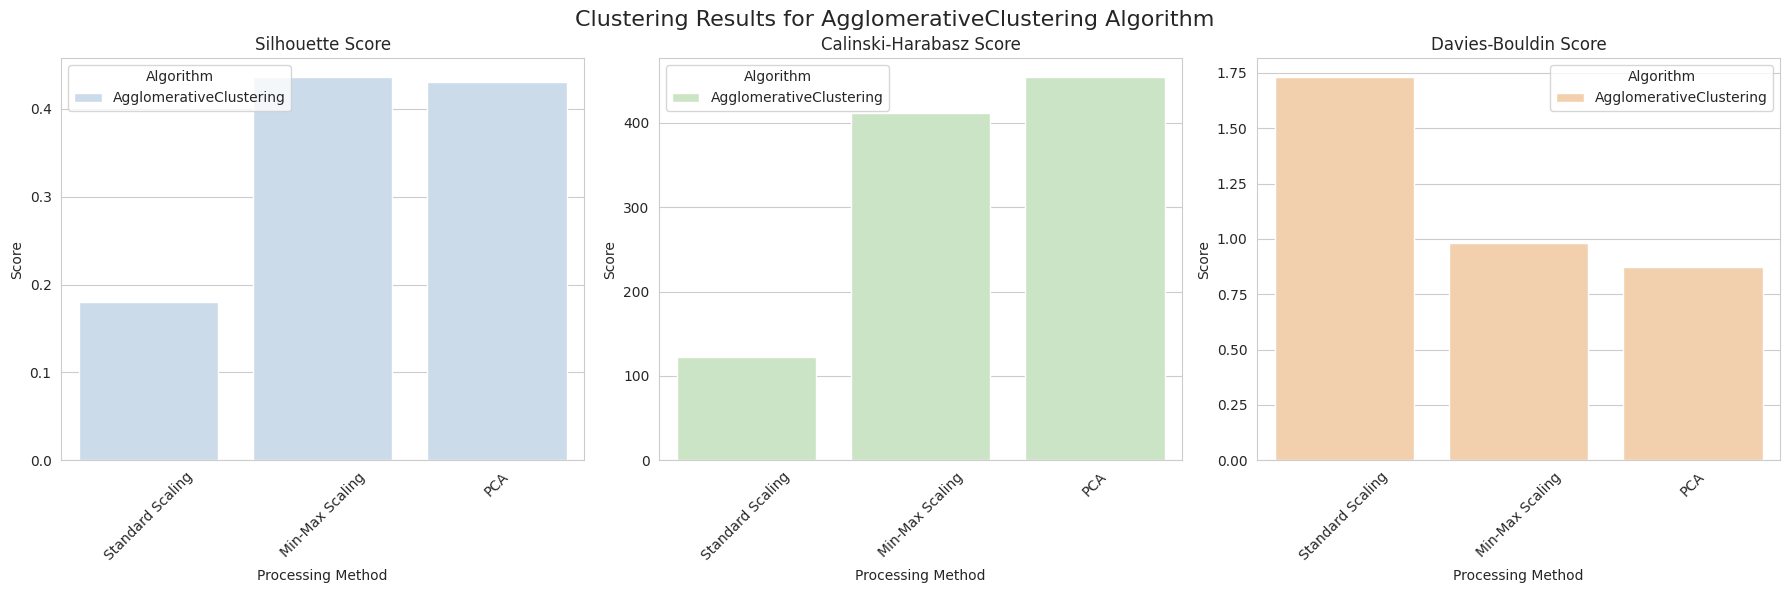

<ipython-input-39-36dbd2e08057>:18: UserWarning: The palette list has more values (3) than needed (1), which may not be intended.
  sns.barplot(x='Processing Method', y='Silhouette Score', data=df, hue='Algorithm', palette=silhouette_palette, ax=axes[0])
<ipython-input-39-36dbd2e08057>:26: UserWarning: The palette list has more values (3) than needed (1), which may not be intended.
  sns.barplot(x='Processing Method', y='Calinski-Harabasz Score', data=df, hue='Algorithm', palette=calinski_palette, ax=axes[1])
<ipython-input-39-36dbd2e08057>:34: UserWarning: The palette list has more values (3) than needed (1), which may not be intended.
  sns.barplot(x='Processing Method', y='Davies-Bouldin Score', data=df, hue='Algorithm', palette=davies_palette, ax=axes[2])


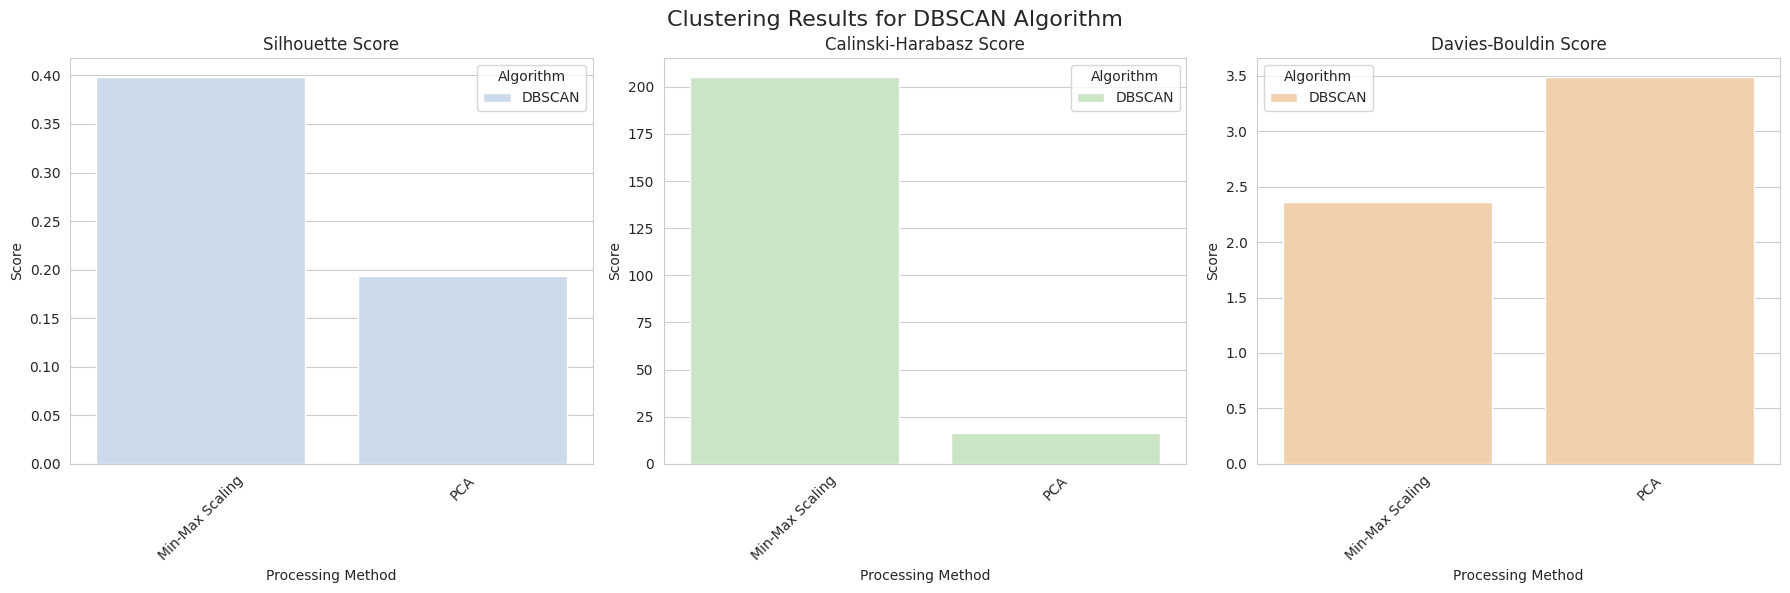

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
sns.set_style("whitegrid")

# Define color palettes for each score
silhouette_palette = sns.color_palette("Blues", len(dfs))
calinski_palette = sns.color_palette("Greens", len(dfs))
davies_palette = sns.color_palette("Oranges", len(dfs))

# Create subplots for each algorithm
for algo_name, df in dfs.items():
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle(f"Clustering Results for {algo_name} Algorithm", fontsize=16)

    # Plot Silhouette Score
    sns.barplot(x='Processing Method', y='Silhouette Score', data=df, hue='Algorithm', palette=silhouette_palette, ax=axes[0])
    axes[0].set_title("Silhouette Score")
    axes[0].set_xlabel("Processing Method")
    axes[0].set_ylabel("Score")
    axes[0].legend(title="Algorithm")
    axes[0].tick_params(axis='x', rotation=45)

    # Plot Calinski-Harabasz Score
    sns.barplot(x='Processing Method', y='Calinski-Harabasz Score', data=df, hue='Algorithm', palette=calinski_palette, ax=axes[1])
    axes[1].set_title("Calinski-Harabasz Score")
    axes[1].set_xlabel("Processing Method")
    axes[1].set_ylabel("Score")
    axes[1].legend(title="Algorithm")
    axes[1].tick_params(axis='x', rotation=45)

    # Plot Davies-Bouldin Score
    sns.barplot(x='Processing Method', y='Davies-Bouldin Score', data=df, hue='Algorithm', palette=davies_palette, ax=axes[2])
    axes[2].set_title("Davies-Bouldin Score")
    axes[2].set_xlabel("Processing Method")
    axes[2].set_ylabel("Score")
    axes[2].legend(title="Algorithm")
    axes[2].tick_params(axis='x', rotation=45)

    # Adjust layout
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)

    # Show plot
    plt.show()
